# House price prediction

* [Phase 0 - Data Insights](#Phase0---Data-Insights)
    * [Info](#Info)
    * [Describe](#Describe)
    * [Missing values](#Missing-values)
    * [Correlation](#Correlation)
        * [Normal](#Normal)
        * [Using log](#Using-log-on-sale-prices)
        * [Most correlated](#Visualizing-most-correlated-features)
    * [Categorical features](#Categorical-Features)
    * [Sale price distribution](#Visualising-sale-price-distribution)
* [Phase 1 - Preprocessing](#Phase1---Preprocessing)
    * [Missing values](#Missing-Values)
        * [Handling](#Missing-values-handling-methods)
    * [Normalization and Standardization](#Normalization-&-Standardization)
    * [Categorical Features](#Categorical-features-handling)
    * [Feature selection](#Feature-selection-and-dimensionality-reduction)
    * [Data splitting](#Data-Splitting-(Train,-Test,-Val))
* [Phase 2 - Model training](#Phase2---Model-training)
    * [Hyperparameter tuning](#Finding-best-preprocessing-hyperparametes-and-model-hyperparameters)
    * [Model accuracies](#Models-MAE-and-RMSE-evaluation)
    * [Hyperparameters plot](#Hyperparameters-plot)
        * [KNN](#K-nearest-neighbors-regressor-hyperparameters-plot)
        * [Decision Tree](#Decision-tree-regressor-max_depth-hyperparameter-plot)
    * [Overfitting/Underfitting](#Overfitting/Underfitting)
        * [Intro](#Intro)
        * [Testing for overfitting](#Testing-for-overfitting)
    * [Processing methods observation on result](#Preprocessing-methods-observations)
* [Phase 3 - Ensemble methods](#Phase-3---Ensemble-Methods)
    * [Random forest](#Random-Forest)
    * [Voting regression](#Voting-Regression)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import feature_selection
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline

In [3]:
houses_df = pd.read_csv("train.csv")
del houses_df["Id"]
houses_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Phase0 - Data Insights

### Info
As shown below There are 79 features in our dataset __mostly non numeric__ data types and there is our target value __SalesPrice.__    
Our houses dataset containes 1460 rows.

In [4]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Describe
Below we can see brief stats about our data for example properties such as  
* count
* mean
* std
* min
* 25% (data count in first quarter)
* 50% (data count in second quarter)
* 75% (data count in third quarter)
* max

In [5]:
houses_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Missing values
Below we can see percentage of missing values in columns with at least one missing value.  
And below is a plot showing missing values compared to available values.

In [6]:
MEANINGFUL_NAN_COLUMNS = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
missing = houses_df[houses_df.columns.difference(MEANINGFUL_NAN_COLUMNS)].isnull().sum()
missing[missing.gt(0)] / houses_df.shape[0] * 100

Electrical      0.068493
GarageYrBlt     5.547945
LotFrontage    17.739726
MasVnrArea      0.547945
MasVnrType      0.547945
dtype: float64

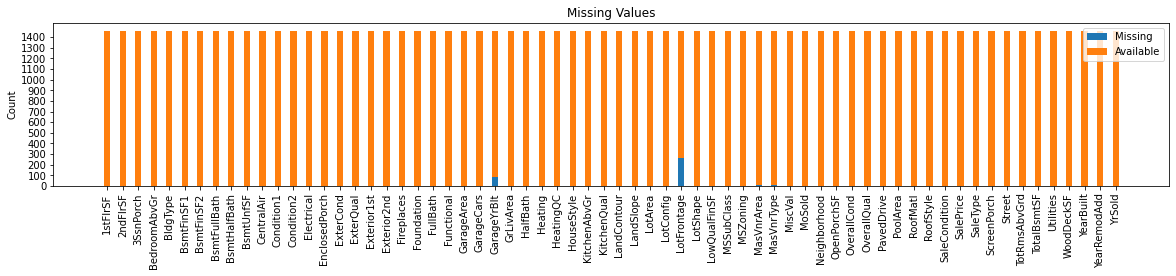

In [7]:
N = houses_df.shape[1] - len(MEANINGFUL_NAN_COLUMNS)
available = tuple(houses_df.shape[0] for i in range(N)) - missing
ind = np.arange(N)
width = 0.4

plt.figure(figsize=(20, 3))
p1 = plt.bar(ind, missing, width)
p2 = plt.bar(ind, available, width,
             bottom= missing)
plt.ylabel('Count')
plt.title('Missing Values')
plt.xticks(ind, houses_df.columns.difference(MEANINGFUL_NAN_COLUMNS), rotation='vertical')
plt.yticks(np.arange(0, 1500, 100))
plt.legend((p1[0], p2[0]), ('Missing', 'Available'))

plt.show()

### Correlation

#### Normal

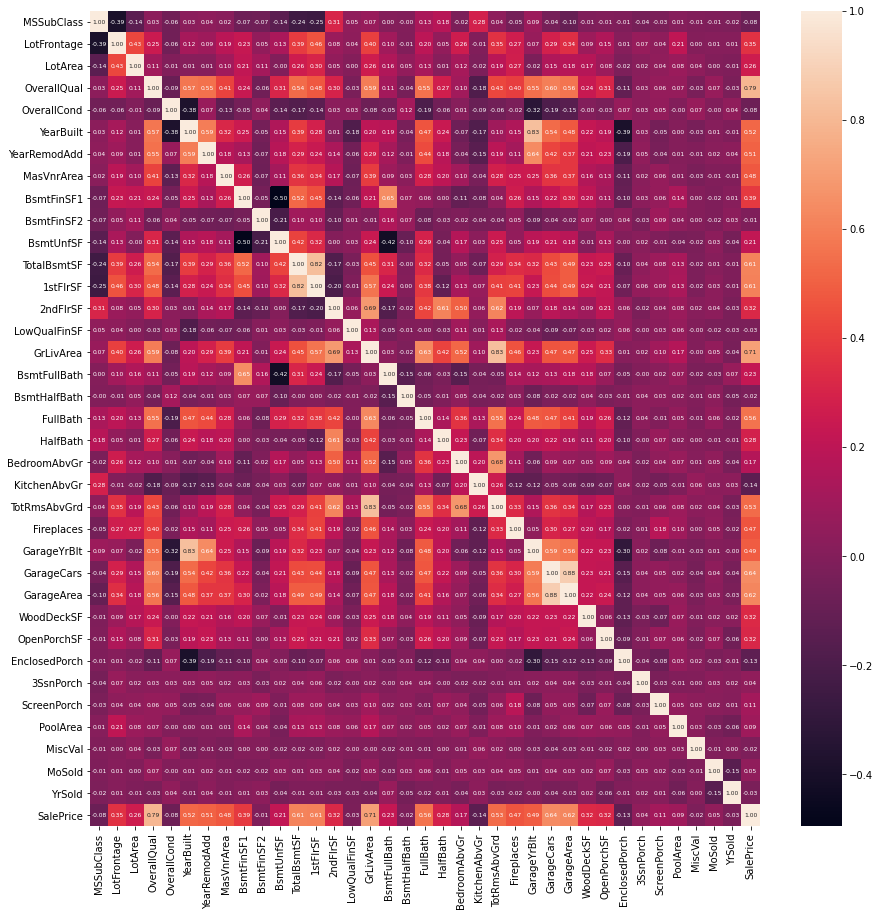

In [8]:
corr = houses_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"fontsize":6})
plt.show()

Below we can see features which have the most correlation with our price target.  
These are  
* Ovarall Qual (Rates the overall material and finish of the house)
* GrLivArea (Above ground living area in square feet)
* GarageCars (Size of garage in car capacity)
* GarageArea (Size of garage in square feet)
* Total square feet of basement area (Total square feet of basement area)

We my use either garageCars or garageArea because they are somehow the same.  
They both give the same information.

In [9]:
corr["SalePrice"].sort_values(ascending=False)[1:6]

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

#### Using log on sale prices
As we can see below after applying the log function our heatmap becomes different to the previous part.  
This is because some features may had __expotential relation__ with SalePrice.  
Applying function may caused their relation to become linear with the target.  
Also we can see a minor rise in correlations of those 5 features because of this change.  
Being exponentialy related is a common phenomena in house prices.

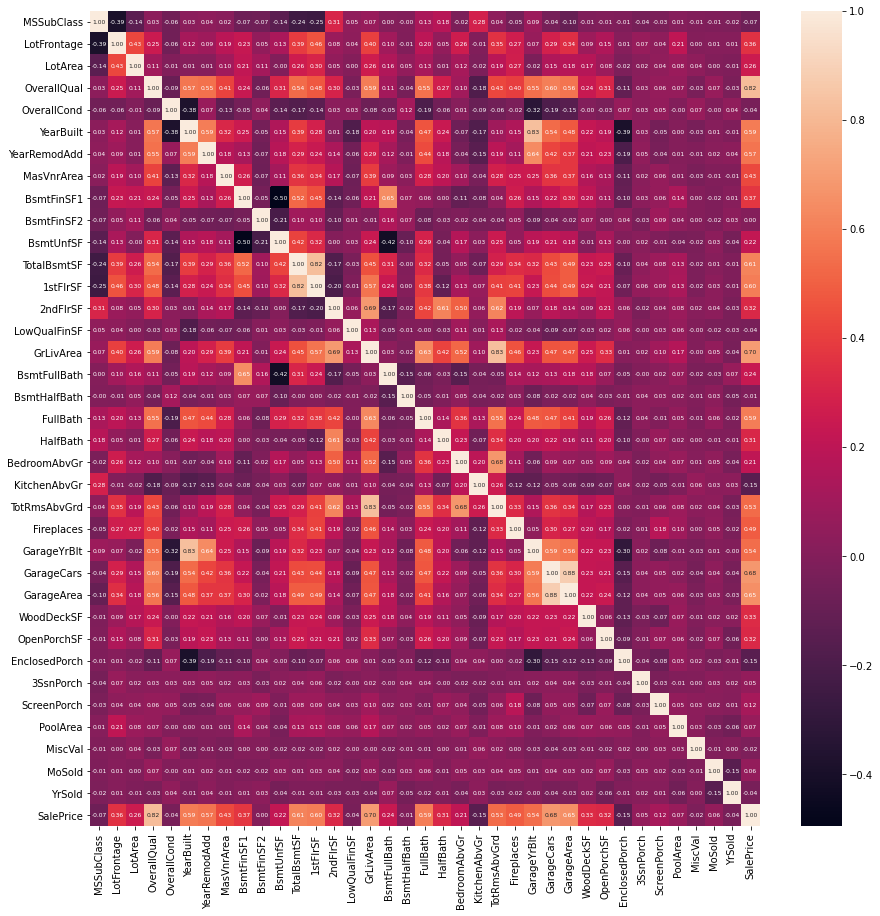

In [10]:
houses_df_copy = houses_df.copy()
houses_df_copy["SalePrice"] = np.log(houses_df_copy["SalePrice"])
corr_log = houses_df_copy.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_log, annot=True, fmt=".2f", annot_kws={"fontsize":6})
plt.show()

In [11]:
corr_log["SalePrice"].sort_values(ascending=False)[1:6]

OverallQual    0.817184
GrLivArea      0.700927
GarageCars     0.680625
GarageArea     0.650888
TotalBsmtSF    0.612134
Name: SalePrice, dtype: float64

I must mention that correlation is not appliable for all features.  
Because it can't act on categorical features.  
Also we can use other methods such as __dimensionality reduction__ methods such as PCA.  
Dimensionality reduction is different from feature selection because it may create new features by combining other features.

#### Visualizing most correlated features
I used hexbin plots to visualize the relation between these features and the target.  
The problem with scatter plot is that in large amount of data it can't show the density.  
But hexbins show this density using colors.

In [12]:
def plot_corr_hex_scatt(column):
    fig = plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.xlabel(column)
    plt.ylabel("SalePrice")
    plt.hexbin(houses_df[column], houses_df["SalePrice"], gridsize=(150,150), cmap=plt.cm.BuGn_r)
    plt.subplot(122)
    plt.xlabel(column)
    plt.scatter(houses_df[column], houses_df["SalePrice"], s=1)

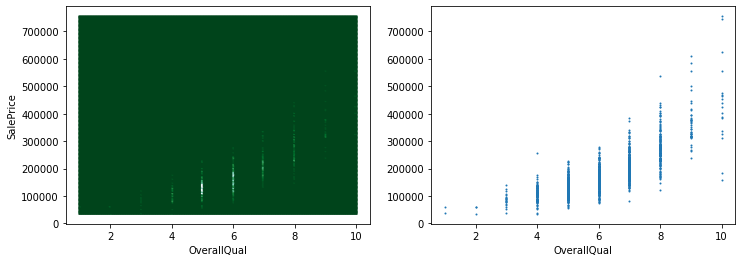

In [13]:
plot_corr_hex_scatt("OverallQual")

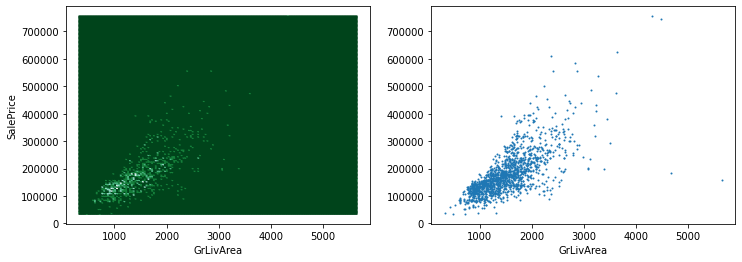

In [14]:
plot_corr_hex_scatt("GrLivArea")

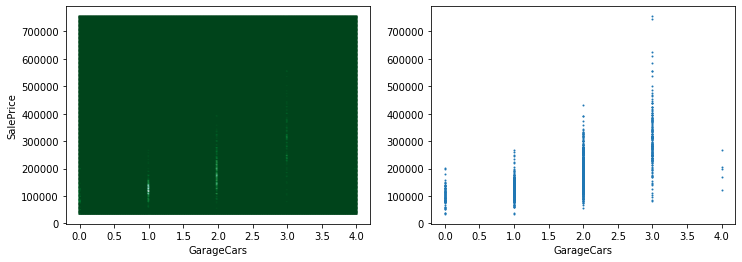

In [15]:
plot_corr_hex_scatt("GarageCars")

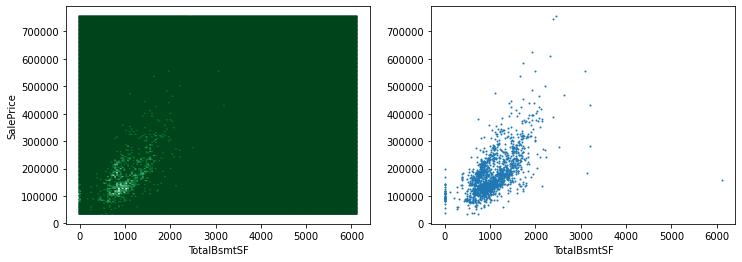

In [16]:
plot_corr_hex_scatt("TotalBsmtSF")

### Categorical Features
I used to approaches to choose best categorical features.
1. Domain knowledge  
    As humans we all have a sense of which categorical features may cause the most offect on price.
2. Chi-Square test  
    This approach checks the independence between features. So for example we may select the top most related features to SalePrice  
    We will use it in the next phases of the project

#### Domain Knowledge
I have selected four features by using common sense of pricings Which are:
* Utilities
* Neighborhood
* ExterQual
* SaleCondition

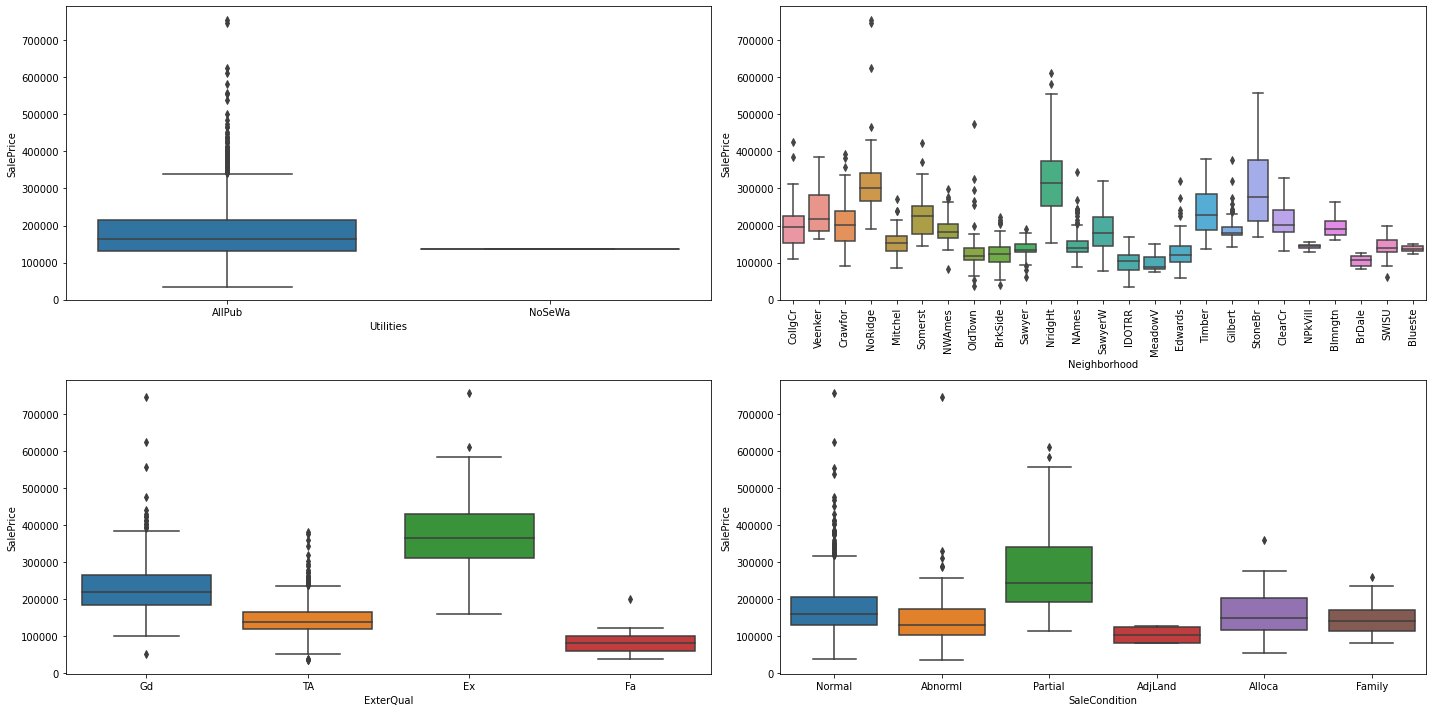

In [17]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
sns.boxplot(x="Utilities", y="SalePrice", data=houses_df, ax=ax1)
sns.boxplot(x="Neighborhood", y="SalePrice", data=houses_df, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
sns.boxplot(x="ExterQual", y="SalePrice", data=houses_df, ax=ax3)
sns.boxplot(x="SaleCondition", y="SalePrice", data=houses_df, ax=ax4)
plt.tight_layout()

#### Visualising sale price distribution
We can also see the gaussian distribution on top of sales prices

180921.19589041095 79415.29188606751


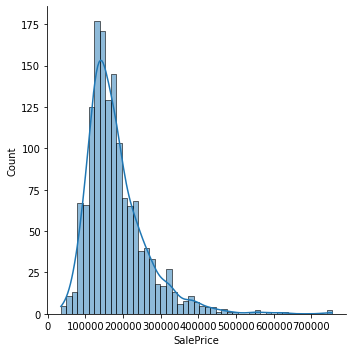

In [18]:
ax = sns.displot(houses_df["SalePrice"], kde = True)
mu, std = stats.norm.fit(houses_df["SalePrice"])
print(mu, std)

## Phase1 - Preprocessing

### Missing Values

First of all we must consider changing false NaN values in our data.  
I mean as we have seen in the last part some NaN values have meaning and we must not consider them as missing values.

In [19]:
houses_df[MEANINGFUL_NAN_COLUMNS] = houses_df[MEANINGFUL_NAN_COLUMNS].fillna("No_")

### Missing values handling methods
1. __Dropping columns__: In this approach we drop columns with missing values.  
    The problem with this approach is that we lose useful data, but it may be effective when most data in a column is missing.
2. __Dropping rows with missing data__: In this method we drop rows with missing values.  
    The problem with this method is that in most cases(depending on our missing data pattern) will lose lots of useful information.  
     For example if most data of a column is not available this approach will delete most rows.  
3. __Imputation using Mean/Median__: In this method we fill missing values with mean/median of the column.  
    The problem with using this approach is that we can't use it on categorical data and it may not be always effecient.  
    The choice to whether use mean or median depends on the domain, outliers influence mean to change a lot but they don't have much influence on median.  
4. __Imputation using other random variables in column__: In this approach we use other available data to fill in missing values.  
5. __Using a model to predict missing values__: This method uses other available features to predict missing values.
6. __Hybrid approach__: Using multiple approaches based on the column properties.  
...

We have seen in the previous phase the percentage of data missing.  
Electrical      0.068493  
GarageYrBlt     5.547945  
LotFrontage    17.739726  
MasVnrArea      0.547945  
MasVnrType      0.547945  

Electrical and MasVnrType are categorical data, but the missing data percentage is really low.  
It may not seem logical to drop them because we lose lots of useful information.  
Other mentioned features are numerical and can be imputed using mentioned approaches.  
There is an __important__ note in MasVnrArea and MasVnrType, We can clearly see that these features are related and we can predict them from each other. 
It is possible to drop one of them or handle them related to each other.

Multiple approaches are implemented in the Pipeline and we will measure the effectiveness of each method on validation data metrics.

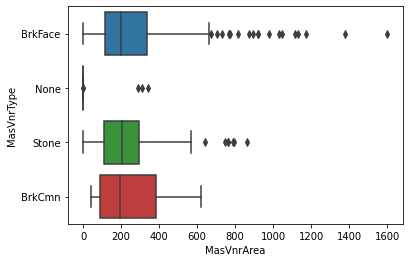

In [20]:
sns.boxplot(x="MasVnrArea", y="MasVnrType", data=houses_df)
plt.show()

In [21]:
del houses_df["MasVnrType"]

As we see below there is just one missing value in Electrical and we replace the missing value with the most common category in this column

In [22]:
houses_df[houses_df["Electrical"].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,No_,Reg,Lvl,AllPub,Inside,...,0,No_,No_,No_,0,5,2008,WD,Normal,167500


In [23]:
houses_df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [24]:
houses_df.loc[houses_df["Electrical"].isnull(), "Electrical"] = "SBrkr"

In [25]:
class MissingValueHandler(BaseEstimator, TransformerMixin):
    def __init__(self, option=None):
        super().__init__()
        self.option = option
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        temp = X.copy()
        if self.option == "drop":
            del temp["GarageYrBlt"]
            del temp["LotFrontage"]
            del temp["MasVnrArea"]
            return temp
        elif self.option == "mean":
            temp['GarageYrBlt'] = temp['GarageYrBlt'].fillna(temp['GarageYrBlt'].mean())
            temp['LotFrontage'] = temp['LotFrontage'].fillna(temp['LotFrontage'].mean())
            temp['MasVnrArea'] = temp['MasVnrArea'].fillna(temp['MasVnrArea'].mean())
            return temp
        elif self.option == "median":
            temp['GarageYrBlt'] = temp['GarageYrBlt'].fillna(temp['GarageYrBlt'].median())
            temp['LotFrontage'] = temp['LotFrontage'].fillna(temp['LotFrontage'].median())
            temp['MasVnrArea'] = temp['MasVnrArea'].fillna(temp['MasVnrArea'].median())
            return temp
        else:
            raise Exception()



### Normalization & Standardization
Normalization usually tries to scale values between 0 and 1.  
But Standardization changes data so that the mean is zero and the standard deviation is one.  
The good point of these approaches is that they get all data to the same scale, This may improve learning and may have better effect on some optimization methods.  
Standardization assumes a gaussian distribution in our data, As we have seen in the last phase this is true for our target data according to the plot.  
We will use these approaches in the next phase to check whether they are effective or not but I assume they may be effective.

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
class NormalizationHandler(BaseEstimator, TransformerMixin):
    def __init__(self, option=None):
        super().__init__()
        self.option = option
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        temp = X.copy()
        s = None
        if self.option == "standard":
            s = StandardScaler()
        elif self.option == "minmax":
            s = MinMaxScaler()
        elif self.option == "max-abs":
            s = MaxAbsScaler()
        else:
            raise Exception()
        numericals = s.fit_transform(X[X.select_dtypes(exclude=['object']).columns])
        numericals_df = pd.DataFrame(numericals, columns=X.select_dtypes(exclude=['object']).columns)
        return pd.concat([numericals_df, temp[temp.select_dtypes(include=['object']).columns]], axis=1)

### Categorical features handling
There are multiple methods to handle categorical features.  
1. __One-Hot encoding__: It creates another new feature column for each group.  
    This approach addes more dimension to our feature data, for example if the initial column has lots of categories it will cause extreme dimensionality.  
2. __Number encoding__: this is almost the easiest way, we map each category to a number.  
3. __Target encoding__: in this approach we substitute each categorical feature with the grouped by average in the target variable, for example SalePrice here.  
4. __Frequency encoding__: this approach replaces each category with its frequency.  
...  
There is no must to handle all categorical features with one method, we can use multiple methods based on our knowledge of data.  
For example as I mentioned earlier there is an obvious relationship between MasVnrArea and MasVnrType that may be useful in our desicion.

In [27]:
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.preprocessing import LabelEncoder

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, option=None):
        super().__init__()
        self.option = option

    def fit(self, X, y=None):
        temp = X.copy()
        if self.option == "target":
            self.categoricals = temp.select_dtypes(include=['object']).columns
            encoder = TargetEncoder(cols=self.categoricals)
            self.target_encoded = encoder.fit_transform(temp, y)
        return self
    
    def transform(self, X, y=None):
        temp = X.copy()
        if self.option == "one-hot":
            encoder = OneHotEncoder(cols=temp.select_dtypes(include=['object']).columns)
            one_hot_encoded = encoder.fit_transform(temp, y)
            for categorical in temp.select_dtypes(include=['object']).columns:
                del temp[categorical]
            return pd.concat([one_hot_encoded, temp], axis=1)
        elif self.option == "label":
            temp[temp.select_dtypes(include=['object']).columns] = temp[temp.select_dtypes(include=['object']).columns].apply(LabelEncoder().fit_transform)
            return temp
        elif self.option == "target":
            return self.target_encoded
        else:
            raise Exception()

### Feature selection and dimensionality reduction
feature selection is meant to choose the most effective features from data.  
As we mentioned earlier we can use the the correlation between features and target to determine the most __numerical__ features.  
For the __categorical features__ we can use the chi-square approach to check independent features from target and remove them.  
Dimensionality reduction may create new features from current features to get more accuraccy.

In [28]:
from sklearn.feature_selection import SelectKBest, chi2
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, k=None):
        super().__init__()
        self.k = k

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        temp = X.copy()
        select_k_best_classifier = SelectKBest(chi2, k=self.k)
        best = select_k_best_classifier.fit_transform(temp, y)
        mask = select_k_best_classifier.get_support()
        new_features = []
        for bool, feature in zip(mask, f.columns):
            if bool:
                new_features.append(feature)
        return pd.DataFrame(best, columns=new_features)

### Data Splitting (Train, Test, Val)
Data splitting is an important phase, If we use whole data for both train and test our mesurments may not be precise,  
because there may be overfitting on train data.  
So we can split our data to train/test to handle this challenge, but again there is another problem  
training the hyperparameters on train data may cause highly optemisitic results so we break our data into three parts, train, test and validation.  

The __P__ ratio depends on lots of metrics but two important metrics to mention are the number of rows in our data and our data itself.  
Assume that we have extremely small data in this situations small p may effect our learning accuracy.  
In larger datasets we can do the split with more confidence. somehow 60 20 20 may be a good rule of thumb but of course there is no general rule and it depends on our dataset.  

There is another approach called __Cross Validation__. In this approach data is splitted in to k folds and each time we hold one fold out and train on other folds.  
This approach helps tackling overfitting problems, cause we do not depend on just a single part of our dataset.  

Another important note to mention is randomness. We must shuffle our data so there is no learning from the sequence of data itself.  
For example if the data gatheres put highest price houses first, our model will learn to predict higher than it should be

In [29]:
from sklearn.model_selection import train_test_split
X = houses_df[houses_df.columns.difference(["SalePrice"])]
y = houses_df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Phase2 - Model training

### Finding best preprocessing hyperparametes and model hyperparameters
Preprocessing decisions can also be modeled as hyperparameters.  
I used Grid Search to determine best preprocessing pipeline and best final model between these models.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

preprocessing_pipeline = Pipeline(
    steps=[("missing", MissingValueHandler()),
                ("normal", NormalizationHandler()),
                ("categorical", CategoricalEncoder()),
                ("features", FeatureSelector()),
          ])
models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=3),
    KNeighborsRegressor(n_neighbors=5),
    KNeighborsRegressor(n_neighbors=7),
    KNeighborsRegressor(n_neighbors=15),
    DecisionTreeRegressor(max_depth=5),
    DecisionTreeRegressor(max_depth=10),
    DecisionTreeRegressor(max_depth=20),
    DecisionTreeRegressor(max_depth=30),
    DecisionTreeRegressor(max_depth=40),
]
complete = Pipeline(steps=[
    ("preprocess", preprocessing_pipeline),
    ("model", LinearRegression())
])

In [31]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    "preprocess__missing__option": ["drop", "mean", "median"],
    "preprocess__categorical__option": ["label"],
    "preprocess__normal": ["passthrough", NormalizationHandler(option="standard"), NormalizationHandler(option="minmax"), NormalizationHandler(option="max-abs")],
    "preprocess__features": ["passthrough", FeatureSelector(k=40), FeatureSelector(k=50), FeatureSelector(k=60), FeatureSelector(k=70)],
    "model": models
}
cv = GridSearchCV(complete, grid_params)

In [32]:
cv.fit(X_train.append(X_test), y_train.append(y_test))

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('missing',
                                                         MissingValueHandler()),
                                                        ('normal',
                                                         NormalizationHandler()),
                                                        ('categorical',
                                                         CategoricalEncoder()),
                                                        ('features',
                                                         FeatureSelector())])),
                                       ('model', LinearRegression())]),
             param_grid={'model': [LinearRegression(),
                                   KNeighborsRegressor(n_neighbors=3),
                                   KNeighborsRegressor(),
                                   KNeighborsRegr...
                         'preprocess__

In [33]:
cv.best_params_

{'model': DecisionTreeRegressor(max_depth=5),
 'preprocess__categorical__option': 'label',
 'preprocess__features': 'passthrough',
 'preprocess__missing__option': 'drop',
 'preprocess__normal': 'passthrough'}

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
y_pred = cv.predict(X_test)
print("MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("RMSE: " + str(mean_squared_error(y_test, y_pred, squared=False))) 

MAE: 21797.394015329413
RMSE: 29969.49773020143


In [35]:
new_preprocess_pipeline = Pipeline(steps=[("missing", MissingValueHandler(option="drop")), ("categorical", CategoricalEncoder(option="label"))])

### Models MAE and RMSE evaluation

In [36]:
test_models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=7),
    DecisionTreeRegressor(max_depth=5)
]

In [37]:
for model in test_models:
    print(str(model))
    pipe = Pipeline(steps=[("preprocess", new_preprocess_pipeline), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print("MAE: " + str(mean_absolute_error(y_test, y_pred))) 
    print("RMSE: " + str(mean_squared_error(y_test, y_pred, squared=False)))
    print("***********************************")

LinearRegression()
MAE: 23167.525325977316
RMSE: 37516.47909532395
***********************************
KNeighborsRegressor(n_neighbors=7)
MAE: 31146.532602252515
RMSE: 50969.04809695975
***********************************
DecisionTreeRegressor(max_depth=5)
MAE: 29716.542858254157
RMSE: 47528.281463379535
***********************************


### Hyperparameters plot

#### K nearest neighbors regressor hyperparameters plot

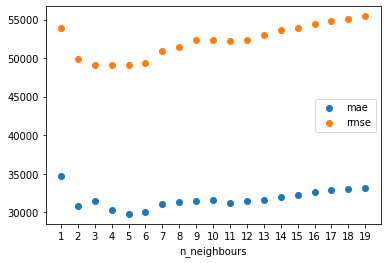

In [38]:
x = np.arange(1, 20, 1)
y_mae = []
y_rmse = []
for n_neighbour in x:
    pipe = Pipeline(steps=[("preprocess", new_preprocess_pipeline), ("model", KNeighborsRegressor(n_neighbors=n_neighbour))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_mae.append(mean_absolute_error(y_test, y_pred))
    y_rmse.append(mean_squared_error(y_test, y_pred, squared=False))
plt.xlabel("n_neighbours")
plt.xticks(x)
plt.scatter(x, y_mae, label="mae")
plt.scatter(x, y_rmse, label="rmse")
plt.legend(loc="best")

#### Decision tree regressor max_depth hyperparameter plot

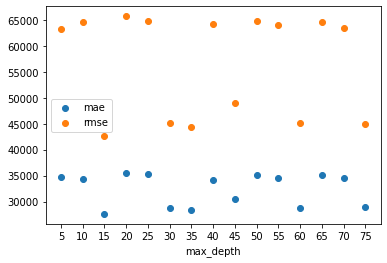

In [39]:
x = np.arange(5, 80, 5)
y_mae = []
y_rmse = []
for max_depth in x:
    pipe = Pipeline(steps=[("preprocess", new_preprocess_pipeline), ("model", DecisionTreeRegressor(max_depth=max_depth))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_mae.append(mean_absolute_error(y_test, y_pred))
    y_rmse.append(mean_squared_error(y_test, y_pred, squared=False))
plt.xlabel("max_depth")
plt.xticks(x)
plt.scatter(x, y_mae, label="mae")
plt.scatter(x, y_rmse, label="rmse")
plt.legend(loc="best")

### Overfitting/Underfitting

#### Intro
Undefitting means that our model is not able to determine the pattern and it does not work well.  
In the example below we can see an example of underfitting.
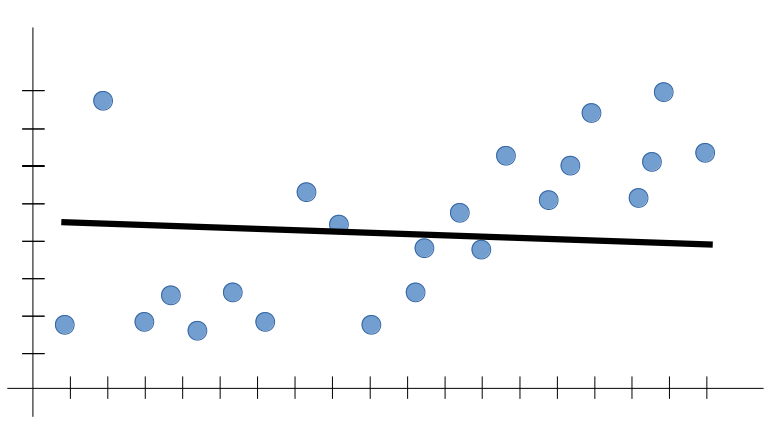
Overfitting on the other side means our models is too dependent on our initial data and can't generalize well.  
For example in the picture below we can see an example of overfitting.
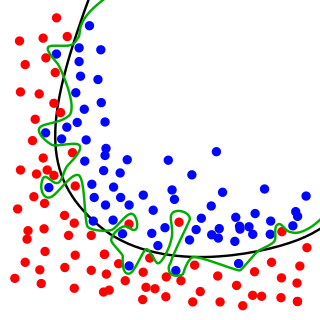
We need a model which neighter overfitts nor underfitts.
There are multiple approaches to tackle overfitting, some of them are:  
* gathering more data  
* creating data from current data  
* end the learning process early  
* ensemble methods  
....

#### Testing for overfitting
One approach is to check the error rate in train and validation set and compare them.  
For example we can plot train and validation loss and compare them as we feed our model.  
Getting high accuracy in training an low accuracy on test set may be a sign of overfitting.  
__Learning curves__ help a lot to visualize overfitting.  
As we see in the following learning curves our models are not overfitted, but with more data they may fit a little bit better.

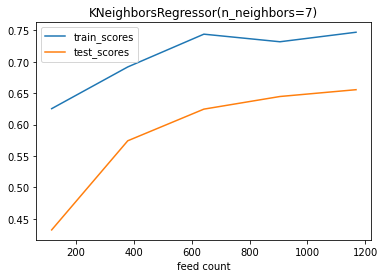

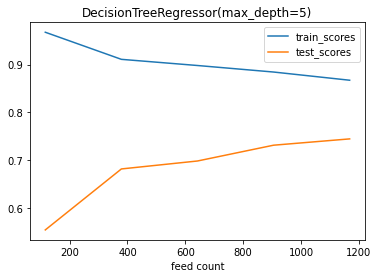

In [40]:
test_models = [
    KNeighborsRegressor(n_neighbors=7),
    DecisionTreeRegressor(max_depth=5)
]
from sklearn.model_selection import learning_curve
for model in test_models:
    pipe = Pipeline(steps=[("preprocess", new_preprocess_pipeline), ("model", model)])
    sizes, train_scores, test_scores =learning_curve(pipe, X, y)
    plt.title(str(model))
    plt.xlabel("feed count")
    plt.plot(sizes, [sum(arr)/len(sizes) for arr in train_scores], label="train_scores")
    plt.plot(sizes, [sum(arr)/len(sizes) for arr in test_scores], label="test_scores")
    plt.legend(loc="best")
    plt.show()

### Preprocessing methods observations

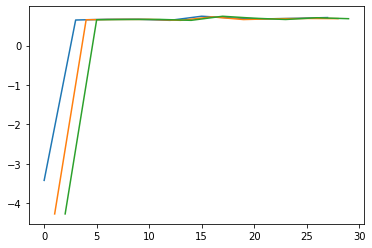

In [41]:
results = pd.DataFrame(cv.cv_results_)
results = results.dropna().reset_index(drop=True)
plt.plot(results[results["param_preprocess__missing__option"]== "drop"]["mean_test_score"])
plt.plot(results[results["param_preprocess__missing__option"]== "mean"]["mean_test_score"])
plt.plot(results[results["param_preprocess__missing__option"]== "median"]["mean_test_score"])

As we see above multiple approaches in handling missing values caused different scores.  
The grid search part chose drop approach but mean and median are somehow the same.  


Multiple Categorical Encoders

In [42]:
temp = MissingValueHandler(option="median").fit_transform(X_train)
out_temp = MissingValueHandler(option="median").fit_transform(X_test)
decision1 = CategoricalEncoder(option="label")
decision2 = CategoricalEncoder(option="target")
out1 = decision1.fit_transform(temp)
y_out1 = decision1.fit_transform(out_temp)
out2 = decision2.fit_transform(temp, y_train)
y_out2 = decision2.fit_transform(out_temp, y_test)

In [43]:
d1 = DecisionTreeRegressor(max_depth=5).fit(out1, y_train)
d2 = DecisionTreeRegressor(max_depth=5).fit(out2, y_train)

In [44]:
y1 = d1.predict(y_out1)
print("MAE: " + str(mean_absolute_error(y1, y_pred))) 
print("RMSE: " + str(mean_squared_error(y1, y_pred, squared=False)))
print("***********************************")
y2 = d1.predict(y_out2)
print("MAE: " + str(mean_absolute_error(y2, y_pred))) 
print("RMSE: " + str(mean_squared_error(y2, y_pred, squared=False)))

MAE: 22170.664296892384
RMSE: 32865.936519811614
***********************************
MAE: 27963.733608470615
RMSE: 40934.274817274374


As we see above in this situation Label encoder was a better decision.

__All other combinations are tested via grid search in the previous section.__

## Phase 3 - Ensemble Methods

### Random Forest

Ensemble learning methods use multiple models to get better results.  
For example random forest uses some decision trees to determine what prediction might be the best

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf_pipe = Pipeline(steps=[("preprocess", new_preprocess_pipeline), ("model", RandomForestRegressor())])
grid_params = {
    "model__max_depth": [5, 10, 15, 20, 25],
    "model__n_estimators": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
}
cv = GridSearchCV(rf_pipe, grid_params)
cv.fit(X_train.append(X_test), y_train.append(y_test))

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('missing',
                                                         MissingValueHandler(option='drop')),
                                                        ('categorical',
                                                         CategoricalEncoder(option='label'))])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [5, 10, 15, 20, 25],
                         'model__n_estimators': [5, 10, 15, 20, 25, 30, 35, 40,
                                                 45, 50]})

In [46]:
cv.best_params_

{'model__max_depth': 20, 'model__n_estimators': 45}

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
y_pred = cv.predict(X_test)
print("MAE: " + str(mean_absolute_error(y_test, y_pred))) 
print("RMSE: " + str(mean_squared_error(y_test, y_pred, squared=False))) 

MAE: 7814.560730620802
RMSE: 11939.593110255422


### Voting Regression
This is another ensemble learning approach, multiple models fit on the dataset and a voting method is used.  
For example we can average the predictions of our multiple models

In [48]:
from sklearn.ensemble import VotingRegressor
voting_regressor_model = VotingRegressor([("l", LinearRegression()), ("k", KNeighborsRegressor(n_neighbors=7)), ("d", DecisionTreeRegressor(max_depth=5))])
pipe = Pipeline(steps=[("preprocess", new_preprocess_pipeline), ("model", voting_regressor_model)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("MAE: " + str(mean_absolute_error(y_test, y_pred))) 
print("RMSE: " + str(mean_squared_error(y_test, y_pred, squared=False))) 

MAE: 21197.082755467618
RMSE: 35274.98930631949


New MAE and RMSE of this voting regrosser is better than the previous losses of each of these modules.  
The reason is that it takes multiple predictions and combines them so it may keep the good part of each part.  
Or for example if one model goes wrong on a data the other models try to fix the prediction.